In [3]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/My Drive/1.0 AI Final Project/Logistic Regression"
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/1.0 AI Final Project/Logistic Regression
 botnet_testing.csv   botnet_training.csv  'Logistic Regression.ipynb'


# Dataset


1.   Load the dataset
2.   Preprocess the dataset
   1. Increase the normal traffic
   2. Identify the traffic per protocol
  

Features of Dataset
*   pkSeqID: row identifier
*   proto: textual representation of transaction protocols present in network flows
*   saddr: source IP address
*   sport: source port number
*   daddr: destination IP addres
*   dport: destination port number
*   seq: argus sequence number
*   stddev: standard deviation of agregated records
*   N_IN_Con_P_SrcIP: number of inbound connections per source IP
*   min: minimum duration of aggregated records
*   state_number: numerical representation of feature state
*   mean: average duration of aggregated records
*   N_IN_Conn_P_DstIP: number of inobound connections per destination IP
*   drate: destination-to-source packets per second
*   srate: source-to-destinationpackets per second
*   max: maximun duration of aggregated records
*   attack: class label
*   category: traffic category
*   subcategory: traffic subcategory






In [5]:
import pandas as pd

columns = ["pkSeqID", "proto", "saddr", "sport", "daddr", "dport", "seq", "stddev", "N_IN_Con_P_SrcIP", "min", "state_number", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max", "attack", "category", "subcategory"]
df_training = pd.read_csv('botnet_training.csv', names = columns)
df_testing = pd.read_csv('botnet_testing.csv', names = columns)

print("Training Dataset:\n")
print(df_training.head())
print("Testing Dataset:\n")
print(df_testing.head())

Training Dataset:

   pkSeqID proto            saddr  sport  ...       max attack  category  subcategory
0  3142762   udp  192.168.100.150   6551  ...  4.031619      1      DDoS          UDP
1  2432264   tcp  192.168.100.150   5532  ...  4.012924      1      DDoS          TCP
2  1976315   tcp  192.168.100.147  27165  ...  3.609205      1      DDoS          TCP
3  1240757   udp  192.168.100.150  48719  ...  4.942302      1       DoS          UDP
4  3257991   udp  192.168.100.147  22461  ...  4.994452      1      DDoS          UDP

[5 rows x 19 columns]
Testing Dataset:

   pkSeqID proto            saddr  sport  ...       max attack  category  subcategory
0   792371   udp  192.168.100.150  48516  ...  4.719438      1       DoS          UDP
1  2056418   tcp  192.168.100.148  22267  ...  4.442930      1      DDoS          TCP
2  2795650   udp  192.168.100.149  28629  ...  4.138455      1      DDoS          UDP
3  2118009   tcp  192.168.100.148  42142  ...  4.229700      1      DDoS        

# Preprocessing Dataset Explanation

Showing how to change the categorical data into numerical data


In [6]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import collections as coll

# print the data types of the stored data
print("Print the Data Types:\n", df_training.dtypes)

# select only the categorical data
obj_df_training = df_training.select_dtypes(include = ['object']).copy()
print("\nPrint the Categorical Attibutes:\n", obj_df_training.head())
print("\nPrint all the Values of the Categories:\n", obj_df_training['category'].value_counts())

# create the clean up dictionary fo the categorical data
cleanup_num = { 'category' : {'Normal': 0, 'DDoS': 1, 'DoS': 2, 'Reconnaissance' : 3, 'Theft': 4}}
obj_df_training = obj_df_training.replace(cleanup_num)
print("\nNumerical Dataset:\n", obj_df_training.head())

Print the Data Types:
 pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Con_P_SrcIP       int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object

Print the Categorical Attibutes:
   proto            saddr  sport          daddr dport category subcategory
0   udp  192.168.100.150   6551  192.168.100.3    80     DDoS         UDP
1   tcp  192.168.100.150   5532  192.168.100.3    80     DDoS         TCP
2   tcp  192.168.100.147  27165  192.168.100.3    80     DDoS         TCP
3   udp  192.168.100.150  48719  192.168.100.3    80      DoS         UDP
4   udp

# Preprocessing the Dataset (Training and Testing datasets)

9 features are not going to be used

*   pkSeqID: row identifier
*   proto: textual representation of transaction protocols present in network flows
*   saddr: source IP address
*   sport: source port number
*   daddr: destination IP addres
*   dport: destination port number
*   seq: argus sequence number
*   state_number: numerical representation of feature state
*   subcategory: traffic subcategory

In [7]:
# delete the unused features of the training dataset
df_training = df_training[["stddev", "N_IN_Con_P_SrcIP", "min", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max", "attack", "category"]]
print(df_training.head())

# delete the unused features of the testing dataset
df_testing = df_testing[["stddev", "N_IN_Con_P_SrcIP", "min", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max", "attack", "category"]]
print(df_testing.head())

# change the categorical data into numerical data
df_training = df_training.replace(cleanup_num)
df_testing = df_testing.replace(cleanup_num)

print(df_training.head())
print(df_testing.head())



     stddev  N_IN_Con_P_SrcIP       min  ...       max  attack  category
0  1.900363               100  0.000000  ...  4.031619       1      DDoS
1  0.078003                38  3.856930  ...  4.012924       1      DDoS
2  0.268666               100  2.974100  ...  3.609205       1      DDoS
3  1.823185                63  0.000000  ...  4.942302       1       DoS
4  0.822418               100  2.979995  ...  4.994452       1      DDoS

[5 rows x 10 columns]
     stddev  N_IN_Con_P_SrcIP       min  ...       max  attack  category
0  0.226784               100  4.100436  ...  4.719438       1       DoS
1  0.451998               100  3.439257  ...  4.442930       1      DDoS
2  1.931553                73  0.000000  ...  4.138455       1      DDoS
3  0.428798                56  3.271411  ...  4.229700       1      DDoS
4  2.058381               100  0.000000  ...  4.753628       1       DoS

[5 rows x 10 columns]
     stddev  N_IN_Con_P_SrcIP       min  ...       max  attack  category
0  1.

# Balancing the Dataset

The BoT-IoT dataset is an unbalanced dataset, maily because it includes a grean number of attack scenarios but almost non normal traffic scenarios. Thus the normal traffic instance will be incleased by duplicating the normal traffic instances


In [5]:
# finding the normal traffic instances 209715
df_training_normal_traffic = df_training[df_training['category'] == 0]
print(df_training_normal_traffic.head())

frames = [df_training_normal_traffic]
# append the normal traffic up to the point of being 20% of the entire dataset
#for i in range(1, 1778):
 # frames.append(df_training_normal_traffic)

df_training_normal_traffic = pd.concat(frames)
print(df_training_normal_traffic.count())


         stddev  N_IN_Con_P_SrcIP       min  ...       max  attack  category
3377   0.235357                 7  0.598172  ...  4.999866       0         0
7683   0.000000                11  0.000000  ...  0.000000       0         0
8844   0.228494                20  0.768694  ...  4.999863       0         0
10110  0.000000                18  0.000000  ...  0.000000       0         0
16479  0.000000                14  0.000000  ...  0.000000       0         0

[5 rows x 10 columns]
stddev               118
N_IN_Con_P_SrcIP     118
min                  118
mean                 118
N_IN_Conn_P_DstIP    118
drate                118
srate                118
max                  118
attack               118
category             118
dtype: int64


# Joining the Dataset with the Extended Normal Traffic

In [6]:
df_training = df_training.append(df_training_normal_traffic, ignore_index = True)
print("\nPrint all the Values of the Categories:\n", df_training['category'].value_counts())


Print all the Values of the Categories:
 1    550955
2    471635
3     25846
0       236
4        21
Name: category, dtype: int64


# Split the data per type of attack



*   DDoS
*   DoS



In [24]:
df_training_DDoS = df_training[df_training['category'] == 1]
df_training_NoDDoS = df_training[df_training['category'] != 1]
df_training_NoDDoS = df_training_NoDDoS.replace({'attack': 1}, 0)
df_training_DDoS = pd.concat([df_training_DDoS, df_training_NoDDoS])
df_training_DDoS = df_training_DDoS.sample(frac=1).reset_index(drop=True)
print(df_training_DDoS)
df_training_DDoS_X = df_training_DDoS[["stddev", "N_IN_Con_P_SrcIP", "min", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max"]]
print(df_training_DDoS_X)
df_training_DDoS_Y = df_training_DDoS[["attack"]]
print(df_training_DDoS_Y)

df_testing_DDoS = df_testing[df_testing['category'] == 1]
df_testing_NoDDoS = df_testing[df_testing['category'] == 1]
df_testing_NoDDoS = df_testing_NoDDoS.replace({'attack': 1}, 0)

df_testing_DDoS = pd.concat([df_testing_DDoS, df_testing_NoDDoS])
df_testing_DDoS = df_testing_DDoS.sample(frac=1).reset_index(drop=True)
df_testing_DDoS_X = df_testing_DDoS[["stddev", "N_IN_Con_P_SrcIP", "min", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max"]]
df_testing_DDoS_Y = df_testing_DDoS[["attack"]]
df_validation_DDoS_X = df_testing_DDoS_X[-10:]
df_validation_DDoS_Y = df_testing_DDoS_Y[-10:]




df_training_DoS = df_training[df_training['category'] == 2]
df_training_NoDoS = df_training[df_training['category'] != 2]
df_training_NoDoS = df_training_NoDoS.replace({'attack': 1}, 0)
df_training_DoS = pd.concat([df_training_DoS, df_training_NoDoS])
df_training_DoS = df_training_DoS.sample(frac=1).reset_index(drop=True)
print(df_training_DDoS)
df_training_DoS_X = df_training_DoS[["stddev", "N_IN_Con_P_SrcIP", "min", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max"]]
print(df_training_DoS_X)
df_training_DoS_Y = df_training_DoS[["attack"]]
print(df_training_DoS_Y)

df_testing_DoS = df_testing[df_testing['category'] == 2]
df_testing_NoDoS = df_testing[df_testing['category'] == 2]
df_testing_NoDoS = df_testing_NoDoS.replace({'attack': 1}, 0)

df_testing_DoS = pd.concat([df_testing_DoS, df_testing_NoDoS])
df_testing_DoS = df_testing_DoS.sample(frac=1).reset_index(drop=True)
df_testing_DoS_X = df_testing_DoS[["stddev", "N_IN_Con_P_SrcIP", "min", "mean", "N_IN_Conn_P_DstIP", "drate", "srate", "max"]]
df_testing_DoS_Y = df_testing_DoS[["attack"]]
df_validation_DoS_X = df_testing_DoS_X[-10:]
df_validation_DoS_Y = df_testing_DoS_Y[-10:]


           stddev  N_IN_Con_P_SrcIP       min  ...       max  attack  category
0        1.847042               100  0.000000  ...  4.055559       1         1
1        0.705052               100  3.002432  ...  4.720335       1         1
2        0.049093                33  0.038141  ...  0.136327       0         2
3        1.594430               100  0.000000  ...  3.547579       1         1
4        0.000000               100  0.000004  ...  0.000004       0         3
...           ...               ...       ...  ...       ...     ...       ...
1048570  2.205606                75  0.000000  ...  4.411211       1         1
1048571  0.000000                88  0.000000  ...  0.000000       1         1
1048572  0.000000               100  0.000000  ...  0.000000       0         2
1048573  0.454785               100  3.981345  ...  4.988064       1         1
1048574  0.455346                91  3.980287  ...  4.989482       1         1

[1048575 rows x 10 columns]
           stddev  N_IN

# Logistic Regression Implementation

In [30]:
epsilon = 1e-7 # number close to zero to avoid log(0) errors

class LogisticRegression:
  
  def __init__(self, alpha : float = 0.00001, epochs : int = 2000, threshold : float = 0.5):
    self.learning_rate = alpha
    self.epochs = epochs
    self.threshold = threshold
    self.accuracy = []
    self.loss = []
    

  def add_bias_feature(self, instances):
    bias = np.ones((instances.shape[0], 1))
    instances = np.append(bias, instances, axis = 1)
    return instances

  def init_params_matrix(selt, number_features):  
    return  np.random.random_sample((number_features, 1)) # Shape (m, 1)

  def sigmoid(self, values):
    return 1 / (1 + np.exp(-values)) # Shape (m, 1)

  def hypothesis(self, params, instances):
    return np.dot(instances, params) # Shape (m, 1)

  def classify(self, predictions):
    return (predictions > self.threshold).astype(np.float64)

  def compute_loss(self, y_predictions, y):
    return np.sum(-y * np.log(y_predictions + epsilon) - (1 - y) * np.log(1 - y_predictions + epsilon)) / len(y)

  def compute_gradients(self, instances, y_predictions, y):
    return np.dot(instances.T, (y_predictions - y)) / len(y)

  def compute_params(self, params, gradients):
    return params - self.learning_rate * gradients

  def plot_accuracy_result(self):
    plt.plot(self.accuracy)
    plt.title('Accuracy')
    plt.show()

  def plot_loss_result(self):
    plt.plot(self.loss)
    plt.title('Loss')
    plt.show()

  def verify_accuracy(self, predictions, y):
    results = np.add(predictions, y)
    passed = np.count_nonzero(results == 0) + np.count_nonzero(results == 2)
    failed = np.count_nonzero(results == 1)   
    return passed / (passed + failed)

  def confusion_matrix(self, params, instances, y):
    y = y.reshape((len(y), 1))
    instances = self.add_bias_feature(instances)

    hypothesis = self.hypothesis(params, instances)
    probability = self.sigmoid(hypothesis)
    predictions = self.classify(probability)

    accuracy = self.verify_accuracy(predictions, y)
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for i in range(len(predictions)):
      if predictions[i] == 1 and y[i] == 1:
        true_positive += 1 
      if predictions[i] == 0 and y[i] == 0:
        true_negative += 1
      if predictions[i] == 1 and y[i] == 0:
        false_positive += 1
      if predictions[i] == 0 and y[i] == 1:
        false_negative += 1

    print('Accuracy: ', accuracy * 100)
    print("True Positive: ", true_positive)
    print("True Negative: ", true_negative)
    print("False Positive: ", false_positive)
    print("False Negative: ", false_negative)
  
  def validate(self, params, instances, y):
    y = y.reshape((len(y), 1))
    instances = self.add_bias_feature(instances)
    hypothesis = self.hypothesis(params, instances)
    probability = self.sigmoid(hypothesis)
    predictions = self.classify(probability)

    for i in range(len(instances)):
      print("Instance: ", instances[i])
      print("\tPrediction: ", predictions[i], " - Expeted: ", y[i])
  
  def fit(self, instances, y):
    y = y.reshape((len(y), 1))
    instances = self.add_bias_feature(instances)
    num_instances, num_features = instances.shape
    params = self.init_params_matrix(num_features)
    previous_best_accuracy = 0
    best_params = params
    lowest_loss = 1000000;
    for i in range(self.epochs):

      hypothesis = self.hypothesis(params, instances)
      probability = self.sigmoid(hypothesis)
      predictions = self.classify(probability)
      loss = self.compute_loss(predictions, y)
      current_accuracy = self.verify_accuracy(predictions, y)

      if current_accuracy > previous_best_accuracy:
        best_params = params
        previous_best_accuracy = current_accuracy
        lowest_loss = loss

      self.accuracy.append(current_accuracy)
      self.loss.append(loss)
      
      print(f"Epoch: {i} - Loss: {loss}")

      gradients = self.compute_gradients(instances, predictions, y)

      params = self.compute_params(params, gradients)

    self.plot_accuracy_result()
    self.plot_loss_result()

    print('Best Parameters:', best_params)
    print('Best Training Accuracy:', previous_best_accuracy * 100)
    print('Lowest Loss:', lowest_loss)

    print('Last Parameters:', params)
    print('Last Training Accuracy:', current_accuracy * 100)
    print('Last Loss:', loss)

    return best_params, lowest_loss, params, loss


# DDoS Attacks

Epoch: 0 - Loss: 7.649130203117929
Epoch: 1 - Loss: 7.649130203117929
Epoch: 2 - Loss: 7.649130203117929
Epoch: 3 - Loss: 7.649130203117929
Epoch: 4 - Loss: 7.649130203117929
Epoch: 5 - Loss: 7.649130203117929
Epoch: 6 - Loss: 7.649130203117929
Epoch: 7 - Loss: 7.649130203117929
Epoch: 8 - Loss: 7.649130203117929
Epoch: 9 - Loss: 7.649130203117929
Epoch: 10 - Loss: 7.649130203117929
Epoch: 11 - Loss: 7.649130203117929
Epoch: 12 - Loss: 7.649130203117929
Epoch: 13 - Loss: 7.649130203117929
Epoch: 14 - Loss: 7.649130203117929
Epoch: 15 - Loss: 7.649130203117929
Epoch: 16 - Loss: 7.649130203117929
Epoch: 17 - Loss: 7.649130203117929
Epoch: 18 - Loss: 7.649130203117929
Epoch: 19 - Loss: 7.649130203117929
Epoch: 20 - Loss: 7.649130203117929
Epoch: 21 - Loss: 7.649130203117929
Epoch: 22 - Loss: 7.649130203117929
Epoch: 23 - Loss: 7.649130203117929
Epoch: 24 - Loss: 7.649130203117929
Epoch: 25 - Loss: 7.649130203117929
Epoch: 26 - Loss: 7.649130203117929
Epoch: 27 - Loss: 7.649130203117929
Ep

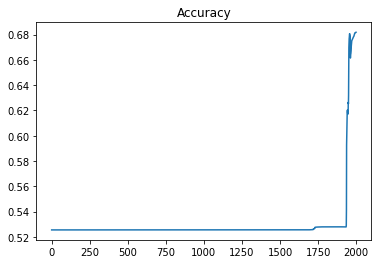

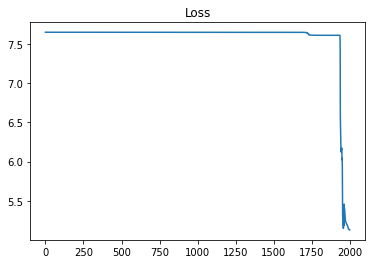

Best Parameters: [[ 0.00828497]
 [ 0.1392485 ]
 [-0.14467184]
 [ 0.84479252]
 [ 0.0273339 ]
 [ 0.13268812]
 [ 0.15600616]
 [ 0.7223045 ]
 [ 0.08468712]]
Best Training Accuracy: 68.19035357509
Lowest Loss: 5.127109168808291
Last Parameters: [[ 0.0082844 ]
 [ 0.13924875]
 [-0.14467956]
 [ 0.84478922]
 [ 0.02733065]
 [ 0.13267508]
 [ 0.15600166]
 [ 0.7222731 ]
 [ 0.08468399]]
Last Training Accuracy: 68.19035357509
Last Loss: 5.127109168808291


In [31]:
logistic_DDoS_regression = LogisticRegression()
DDoS_attacks_params, DDoS_lowest_loss, DDoS_last_params, DDoS_last_loss = logistic_DDoS_regression.fit(df_training_DDoS_X.values, df_training_DDoS_Y.values)

In [32]:
logistic_DDoS_regression.confusion_matrix(DDoS_attacks_params, df_testing_DDoS_X.values, df_testing_DDoS_Y.values)
logistic_DDoS_regression.confusion_matrix(DDoS_last_params, df_testing_DDoS_X.values, df_testing_DDoS_Y.values)

Accuracy:  50.0
True Positive:  290076
True Negative:  95233
False Positive:  290076
False Negative:  95233
Accuracy:  50.0
True Positive:  290023
True Negative:  95286
False Positive:  290023
False Negative:  95286


In [33]:
logistic_DDoS_regression.validate(DDoS_attacks_params, df_validation_DDoS_X.values, df_validation_DDoS_Y.values)

Instance:  [  1.   0. 100.   0.   0. 100.   0.   0.   0.]
	Prediction:  [0.]  - Expeted:  [0]
Instance:  [  1.         1.673613  46.         0.         2.366282 100.
   0.         0.295242   3.594216]
	Prediction:  [1.]  - Expeted:  [0]
Instance:  [1.000000e+00 1.828423e+00 1.000000e+02 1.647110e-01 2.747496e+00
 1.000000e+02 8.163200e-02 4.081590e-01 4.146650e+00]
	Prediction:  [0.]  - Expeted:  [0]
Instance:  [1.000000e+00 6.101300e-02 1.000000e+02 3.493019e+00 3.554033e+00
 1.000000e+02 0.000000e+00 2.838700e-01 3.615046e+00]
	Prediction:  [1.]  - Expeted:  [1]
Instance:  [  1.         0.992678 100.         2.032643   3.43615  100.
   0.         0.485548   4.165092]
	Prediction:  [1.]  - Expeted:  [0]
Instance:  [  1.         1.416216  87.         1.984014   3.986808 100.
   0.         1.002752   4.998889]
	Prediction:  [1.]  - Expeted:  [0]
Instance:  [  1.         0.317243 100.         3.480967   3.92931  100.
   0.         0.531737   4.167819]
	Prediction:  [1.]  - Expeted:  [0]


# DoS Attacks

Epoch: 0 - Loss: 8.868391920177757
Epoch: 1 - Loss: 8.868391920177757
Epoch: 2 - Loss: 8.868391920177757
Epoch: 3 - Loss: 8.868391920177757
Epoch: 4 - Loss: 8.868391920177757
Epoch: 5 - Loss: 8.868391920177757
Epoch: 6 - Loss: 8.868391920177757
Epoch: 7 - Loss: 8.868391920177757
Epoch: 8 - Loss: 8.868391920177757
Epoch: 9 - Loss: 8.868391920177757
Epoch: 10 - Loss: 8.868391920177757
Epoch: 11 - Loss: 8.868391920177757
Epoch: 12 - Loss: 8.868391920177757
Epoch: 13 - Loss: 8.868391920177757
Epoch: 14 - Loss: 8.868391920177757
Epoch: 15 - Loss: 8.868391920177757
Epoch: 16 - Loss: 8.868391920177757
Epoch: 17 - Loss: 8.868391920177757
Epoch: 18 - Loss: 8.868391920177757
Epoch: 19 - Loss: 8.868391920177757
Epoch: 20 - Loss: 8.868391920177757
Epoch: 21 - Loss: 8.868391920177757
Epoch: 22 - Loss: 8.868391920177757
Epoch: 23 - Loss: 8.868391920177757
Epoch: 24 - Loss: 8.868391920177757
Epoch: 25 - Loss: 8.868391920177757
Epoch: 26 - Loss: 8.868391920177757
Epoch: 27 - Loss: 8.868391920177757
Ep

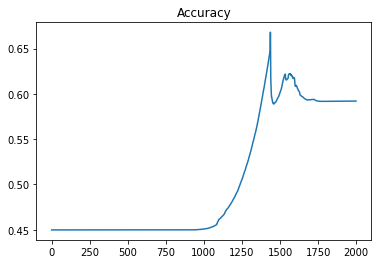

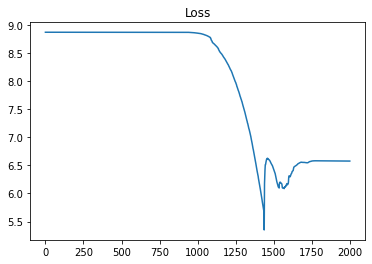

Best Parameters: [[ 0.1846055 ]
 [ 0.18900666]
 [ 0.26656492]
 [ 0.52323263]
 [ 0.39205067]
 [-0.26913375]
 [ 0.11414267]
 [ 0.68377409]
 [ 0.87328833]]
Best Training Accuracy: 66.79798774527335
Lowest Loss: 5.351532026461764
Last Parameters: [[ 0.18445947]
 [ 0.18820679]
 [ 0.24192407]
 [ 0.52101244]
 [ 0.38870224]
 [-0.29486819]
 [ 0.11163904]
 [ 0.66673689]
 [ 0.86937068]]
Last Training Accuracy: 59.198912810242476
Last Loss: 6.57635820067711


In [34]:
logistic_DoS_regression = LogisticRegression()
DoS_attacks_params, DoS_lowest_loss, DoS_last_params, DoS_last_loss = logistic_DoS_regression.fit(df_training_DoS_X.values, df_training_DoS_Y.values)

In [35]:
logistic_DoS_regression.confusion_matrix(DoS_attacks_params, df_testing_DoS_X.values, df_testing_DoS_Y.values)
logistic_DoS_regression.confusion_matrix(DoS_last_params, df_testing_DoS_X.values, df_testing_DoS_Y.values)

Accuracy:  50.0
True Positive:  321560
True Negative:  8552
False Positive:  321560
False Negative:  8552
Accuracy:  50.0
True Positive:  173307
True Negative:  156805
False Positive:  173307
False Negative:  156805


In [36]:
logistic_DoS_regression.validate(DoS_attacks_params, df_validation_DoS_X.values, df_validation_DoS_Y.values)

Instance:  [  1.         1.924808 100.         0.         3.848161 100.
   0.         0.608513   4.911178]
	Prediction:  [1.]  - Expeted:  [0]
Instance:  [1.000000e+00 1.148100e-02 6.600000e+01 3.561593e+00 3.572458e+00
 6.600000e+01 0.000000e+00 2.797340e-01 3.591729e+00]
	Prediction:  [1.]  - Expeted:  [1]
Instance:  [ 1.        2.051328 56.        0.        1.67363  56.        0.
  0.190913  4.310466]
	Prediction:  [1.]  - Expeted:  [1]
Instance:  [ 1.        0.       31.        0.        0.       31.        0.
  0.104938  0.      ]
	Prediction:  [1.]  - Expeted:  [0]
Instance:  [ 1.        0.       79.        0.        0.       79.        0.
  0.119157  0.      ]
	Prediction:  [1.]  - Expeted:  [0]
Instance:  [  1.         1.810311 100.         0.         2.215784 100.
   0.         0.215703   3.808988]
	Prediction:  [1.]  - Expeted:  [1]
Instance:  [1.00000e+00 9.92260e-02 1.00000e+02 0.00000e+00 5.63940e-02 1.00000e+02
 4.07620e-02 1.30820e-01 2.53628e-01]
	Prediction:  [1.]  - E